# Learning curve
### Table of contents
1. [Data preprocessing](#Data-preprocessing)
2. [Fitting random forest](#Fit-random-forest-and-run-10-fold-CV-validation)
3. [Feature importance](#Feature-importance)

In [1]:
import argparse
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn.apionly as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, learning_curve

import comptools as comp
import comptools.analysis.plotting as plotting

# Plotting-related
color_dict = comp.analysis.get_color_dict()
%matplotlib inline

/home/jbourbeau/.virtualenvs/composition/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Data preprocessing
1. Load simulation dataframe and apply specified quality cuts
2. Extract desired features from dataframe
3. Get separate testing and training datasets

In [3]:
# df_sim, cut_dict_sim = comp.load_dataframe(type_='sim', config='IT73', return_cut_dict=True)
# selection_mask = np.array([True] * len(df_sim))
# standard_cut_keys = ['lap_reco_success', 'lap_zenith', 'num_hits_1_30', 'IT_signal',
#                      'max_qfrac_1_30', 'lap_containment', 'energy_range_lap']
# for key in standard_cut_keys:
#     selection_mask *= cut_dict_sim[key]

# df_sim = df_sim[selection_mask]

# feature_list, feature_labels = comp.get_training_features()
# print('training features = {}'.format(feature_list))
# X_train_sim, X_test_sim, y_train_sim, y_test_sim, le = comp.get_train_test_sets(
#     df_sim, feature_list, comp_class=True, train_he=True, test_he=True)

# print('number training events = ' + str(y_train_sim.shape[0]))
# print('number testing events = ' + str(y_test_sim.shape[0]))

/home/jbourbeau/cr-composition/composition/load_dataframe.py:88: RuntimeWarning: divide by zero encountered in log10
  df['log_NChannels_1_30'] = np.nan_to_num(np.log10(df['NChannels_1_30']))
/home/jbourbeau/cr-composition/composition/load_dataframe.py:89: RuntimeWarning: divide by zero encountered in log10
  df['log_NHits_1_30'] = np.nan_to_num(np.log10(df['NHits_1_30']))


training features = ['lap_log_energy', 'lap_cos_zenith', 'log_NChannels_1_30', 'nchannels_nhits_ratio', 'lap_likelihood', 'log_NHits_1_30', 'StationDensity', 'stationdensity_charge_ratio', 'nchannels_nhits_ratio', 'log_s50', 'log_s80', 'log_s125', 'log_s180', 'log_s250', 'log_s500', 'lap_beta']
number training events = 145932
number testing events = 62543


In [3]:
df_sim_train, df_sim_test = comp.load_sim(config='IC86.2012')

Starting out with 108522 sim events
sim quality cut event flow:
      passed_IceTopQualityCuts:    1.0    1.0
FractionContainment_Laputop_InIce:  0.793  0.793
       passed_InIceQualityCuts:  0.795   0.76
                 num_hits_1_60:  0.997  0.759
             reco_energy_range:  0.874  0.662




In [8]:
df_sim_train.shape

(50301, 74)

In [5]:
feature_list, feature_labels = comp.analysis.get_training_features()

## Feature selection

In [6]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# pipeline = comp.get_pipeline('RF')
# sfs = SFS(pipeline, 
#           k_features=6, 
#           forward=True, 
#           floating=False, 
#           scoring='accuracy',
#           print_progress=True,
#           cv=3,
#           n_jobs=10)
# sfs = sfs.fit(X_train_sim, y_train_sim)

Features: 6/6

## Feature transform

In [7]:
# X_train_sim = sfs.transform(X_train_sim)
# X_test_sim = sfs.transform(X_test_sim)

## Produce 10-fold CV learning curve

[learning_curve] Training set sizes: [ 4527  9054 13581 18108 22635 27162 31689 36216 40743 45270]
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ................................................................
[CV]  ...........................................

[Parallel(n_jobs=20)]: Done  33 out of 100 | elapsed:   17.4s remaining:   35.2s


[CV] ................................. , score=0.744334, total=   5.2s
[CV]  ................................................................
[CV] ................................. , score=0.741801, total=  17.9s
[CV]  ................................................................
[CV] ................................. , score=0.742744, total=   5.2s
[CV]  ................................................................
[CV] ................................. , score=0.737177, total=   2.4s
[CV]  ................................................................
[CV] ................................. , score=0.748310, total=   2.5s
[CV]  ................................................................
[CV] ................................. , score=0.748509, total=  10.0s
[CV]  ................................................................
[CV] ................................. , score=0.745328, total=   6.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=20)]: Done  67 out of 100 | elapsed:   32.1s remaining:   15.8s


[CV] ................................. , score=0.750298, total=  13.3s
[CV]  ................................................................
[CV] ................................. , score=0.743539, total=   3.6s
[CV]  ................................................................
[CV] ................................. , score=0.748310, total=   3.9s
[CV]  ................................................................
[CV] ................................. , score=0.747913, total=  15.7s
[CV]  ................................................................
[CV] ................................. , score=0.738914, total=   2.0s
[CV]  ................................................................
[CV] ................................. , score=0.745328, total=   8.8s
[CV]  ................................................................
[CV] ................................. , score=0.745328, total=   9.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:   51.0s finished


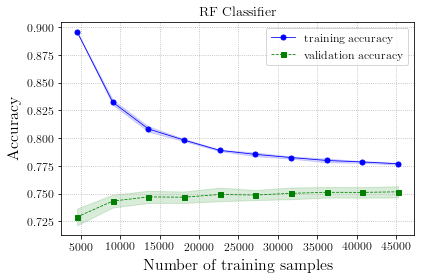

In [11]:
pipeline = comp.get_pipeline('BDT')

train_sizes, train_scores, test_scores =\
    learning_curve(estimator=pipeline,
                   X=df_sim_train[feature_list],
                   y=df_sim_train['target'],
#                    train_sizes=[0.2, 0.5, 0.75],
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   cv=10,
                   n_jobs=20,
                   verbose=3)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='b', linestyle='-',
         marker='o', markersize=5,
         label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='b')

plt.plot(train_sizes, test_mean,
         color='g', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='g')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('RF Classifier')
plt.legend()
# plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

In [11]:
pipeline.named_steps['classifier']

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=20, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

max_depth = 2
max_depth = 5
max_depth = 6
max_depth = 10


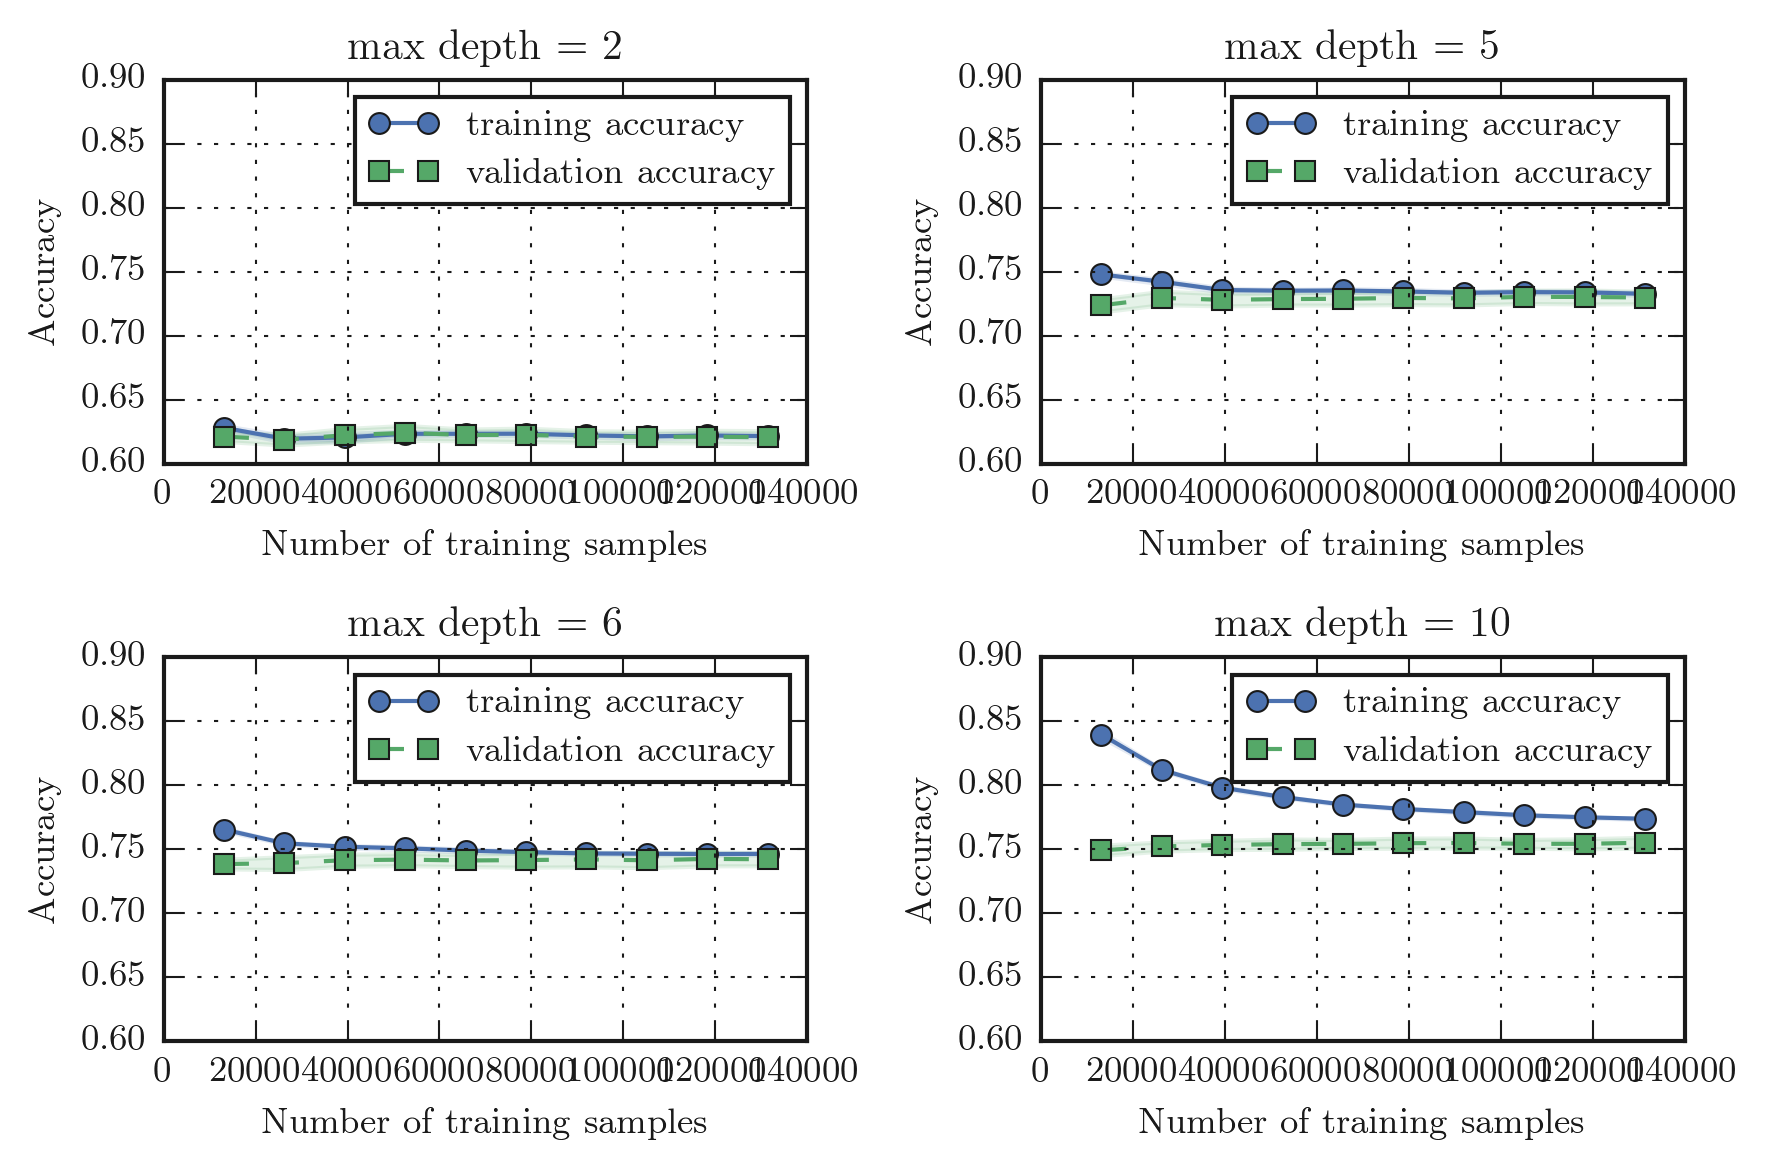

In [10]:
fig, axarr = plt.subplots(2, 2)
for max_depth, ax in zip([2, 5, 6, 10], axarr.flatten()):
    print('max_depth = {}'.format(max_depth))
    pipeline = comp.get_pipeline('RF')
    params = {'classifier__max_depth': max_depth}
    pipeline.set_params(**params)

    train_sizes, train_scores, test_scores =\
        learning_curve(estimator=pipeline,
                       X=X_train_sim,
                       y=y_train_sim,
                       train_sizes=np.linspace(0.1, 1.0, 10),
                       cv=10,
                       n_jobs=20,
                       verbose=0)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    ax.plot(train_sizes, train_mean,
             color='b', linestyle='-',
             marker='o', markersize=5,
             label='training accuracy')

    ax.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='b')

    ax.plot(train_sizes, test_mean,
             color='g', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    ax.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='g')

    ax.grid()
    ax.set_xlabel('Number of training samples')
    ax.set_ylabel('Accuracy')
    ax.set_title('max depth = {}'.format(max_depth))
    ax.set_ylim([0.6, 0.9])
    ax.legend()
plt.tight_layout()
plt.show()